In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('lines', markersize=3)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

%matplotlib inline

In [2]:
def myplot_raw(df, comment, ax):
    angle, counts = df["angle [deg]"].to_numpy(), df["counting rate [cps]"].to_numpy()
    plot = ax.plot(angle, counts)
    ax.set_xlabel('Angle (Degrees)')
    ax.set_ylabel('counts/sec')
    ax.set_title(f"X-Ray Diffraction {comment}")
    ax.set_xlim(min(angle),max(angle))
    ax.grid(True)
    # ax.set_xticks(np.linspace(min(angle), max(angle), 10));


In [3]:
# fig, axs = plt.subplots(2, 4, figsize=(30,10))

lifSide1 = pd.read_csv('run1_lif_side.txt', delimiter='\t')
lifVert2 = pd.read_csv('run2_lif_vert.txt', delimiter='\t')
lifVert3 = pd.read_csv('run3_lif_vert.txt', delimiter='\t')
lifVert4 = pd.read_csv('run4_lif_vert.txt', delimiter='\t')
lifVert5 = pd.read_csv('run5_lif_vert.txt', delimiter='\t')
lifVert6 = pd.read_csv('run6_lif_vert.txt', delimiter='\t')
naclVert1 = pd.read_csv('run1_nacl_vert.txt', delimiter='\t')
naclVert2 = pd.read_csv('run2_nacl_vert.txt', delimiter='\t')

# myplot_raw(lifSide1, "(LiF Side Run 1)", axs[0,0])
# myplot_raw(lifVert2, "(LiF Vert Run 2)", axs[1,0])
# myplot_raw(lifVert3, "(LiF Vert Run 3)", axs[0,1])
# myplot_raw(lifVert4, "(LiF Vert Run 4)", axs[1,1])
# myplot_raw(lifVert5, "(LiF Vert Run 5)", axs[0,2])
# myplot_raw(lifVert6, "(LiF Vert Run 6)", axs[1,2])
# myplot_raw(naclVert1, "(NaCl Vert Run 1)", axs[0,3])
# myplot_raw(naclVert2, "(NaCl Side Run 2)", axs[1,3])


In [4]:
from scipy.optimize import curve_fit

def myplot_gaus(df, comment, ax, parDict, IC=[1, 1, 1]):
    angle, counts = df["angle [deg]"].to_numpy(), df["counting rate [cps]"].to_numpy()
    def gaus(x, A, mu, sig): # This is a 2 brain cell way to do this, probably could be optimized but it works and was easy to code
        return A*np.exp(-(mu-x)**2/(2*sig**2))
    def gaus2(x, A1, mu1, sig1, A2, mu2, sig2, cons):
        return gaus(x, A1, mu1, sig1) + gaus(x, A2, mu2, sig2) + cons
    def gaus4(x, A1, mu1, sig1, A2, mu2, sig2, A3, mu3, sig3, A4, mu4, sig4, cons):
        return gaus(x, A1, mu1, sig1) + gaus(x, A2, mu2, sig2) + gaus(x, A3, mu3, sig3) + gaus(x, A4, mu4, sig4) + cons
    

    plot = ax.plot(angle, counts)
    if len(IC)/3 == 2:
        pars, cov = curve_fit(gaus2, angle, counts, p0=IC+[0])#, bounds=([0.75*k for k in IC]+[0], [1.5*k for k in IC]+[100]))
        ax.plot(angle, gaus2(angle, *pars))
    elif len(IC)/3 == 4:
        pars, cov = curve_fit(gaus4, angle, counts, p0=IC+[0])#, bounds=([0.75*k for k in IC]+[0], [1.5*k for k in IC]+[100]))
        ax.plot(angle, gaus4(angle, *pars))
    parDict[comment] = pars
    ax.set_xlabel('Angle (Degrees)')
    ax.set_ylabel('counts/sec')
    ax.set_title(f"X-Ray Diffraction {comment}")
    ax.set_xlim(min(angle),max(angle))
    ax.grid(True)
    ax.legend(["Data", "Fit"])
    # ax.set_xticks(np.linspace(min(angle), max(angle), 10));

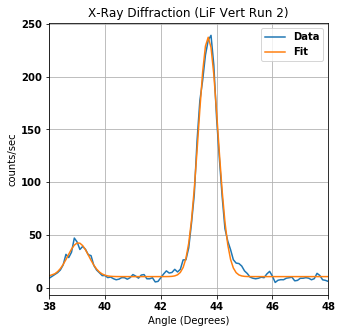

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
myplot_gaus(lifVert2, "(LiF Vert Run 2)", axs, {}, IC=[50, 39, .5, 250, 43.75, .5])

plt.savefig("oneplot_LiF2.png")

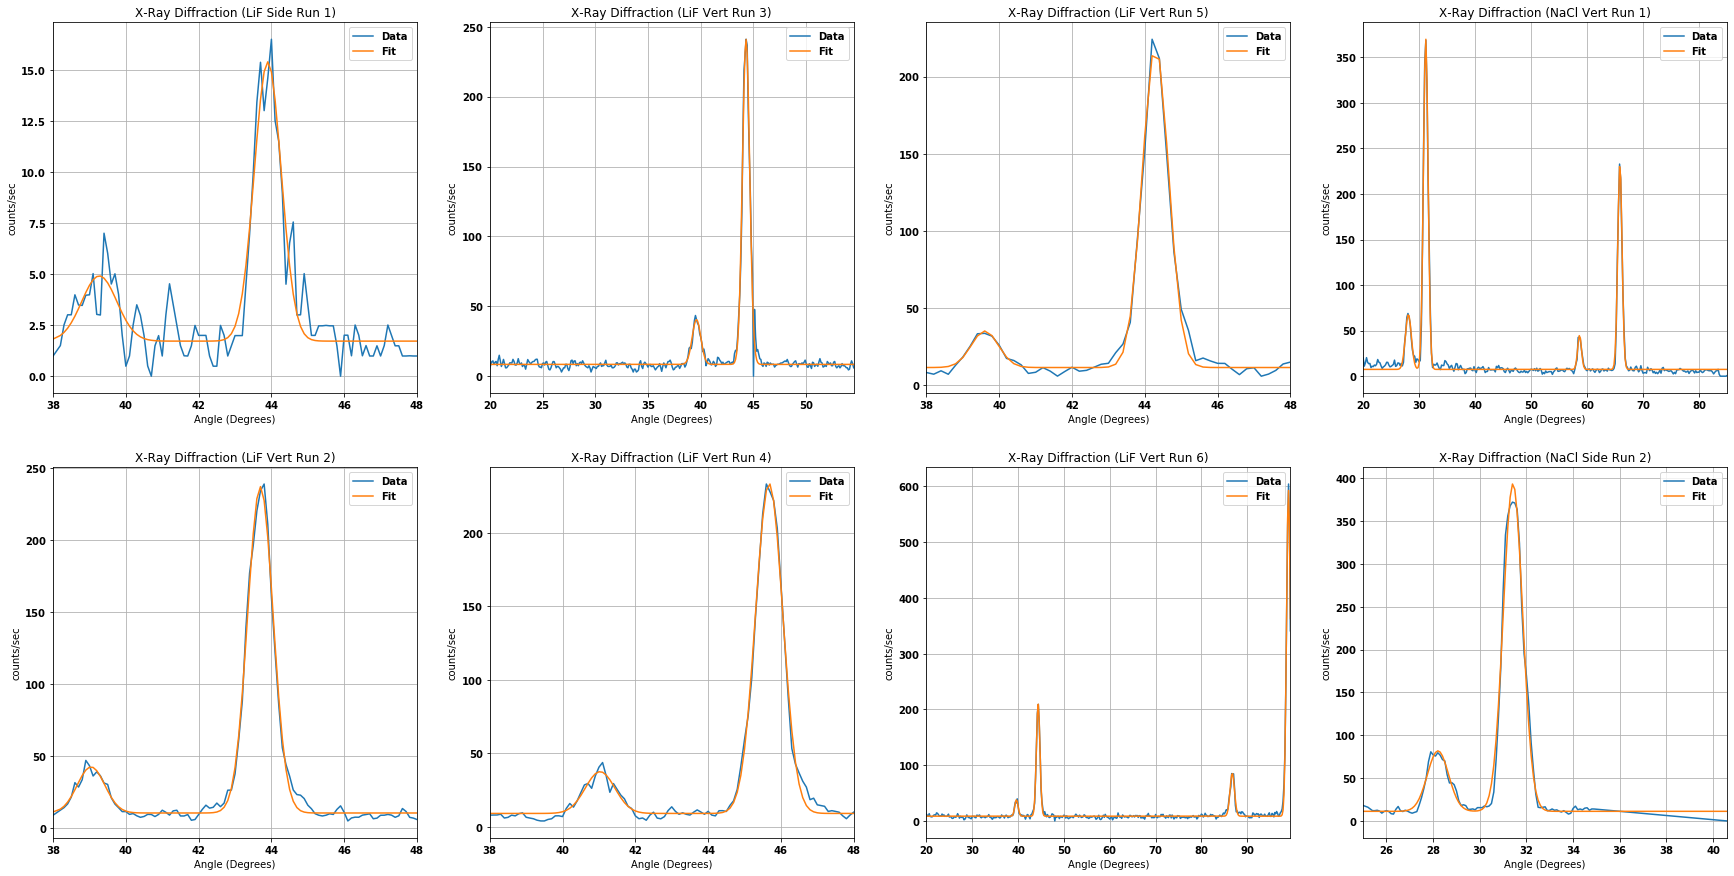

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(30,15))
param_dict={}
myplot_gaus(lifSide1, "(LiF Side Run 1)", axs[0,0], param_dict, IC=[7, 39.5, .6, 15, 44, .5])
myplot_gaus(lifVert2, "(LiF Vert Run 2)", axs[1,0], param_dict, IC=[50, 39, .5, 250, 43.75, .5])
myplot_gaus(lifVert3, "(LiF Vert Run 3)", axs[0,1], param_dict, IC=[50, 43.75, .5, 250, 39.5, .5])
myplot_gaus(lifVert4, "(LiF Vert Run 4)", axs[1,1], param_dict, IC=[50, 41, .5, 225, 45.75, .5])
myplot_gaus(lifVert5, "(LiF Vert Run 5)", axs[0,2], param_dict, IC=[30, 39.75, .5, 225, 44.2, .5])
myplot_gaus(lifVert6, "(LiF Vert Run 6)", axs[1,2], param_dict, IC=[50, 39.5, .5, 200, 44, .5, 100,  86.5, .5, 600,  100, 1])
myplot_gaus(naclVert1, "(NaCl Vert Run 1)", axs[0,3], param_dict, IC=[75, 28, .5, 360, 31.5, .5, 50, 58.5, .5, 240, 66, .5])
myplot_gaus(naclVert2, "(NaCl Side Run 2)", axs[1,3], param_dict, IC=[75, 28.5, 0.6, 360, 31.5, 0.5])

plt.savefig("oneplot_LiF2.png")

In [7]:
print("\\begin{tabular}{c|cc}")
print("\tRun & $\\mu$ & $\\sigma$ \\\ \\hline", end="")
for key in param_dict.keys():
    if "NaCl Vert Run 1" in key: print("\\hline", end="")
    values = param_dict[key][:-1]
    print(f"\n\t{key[1:-1]}", end="")
    for v in range(values.shape[0]):
        if v%3 != 0:
            print(f" & {values[v]:.3f}", end="")
    for v in range(10-values.shape[0]):
        print(" & ------", end="")
    print(" \\\ ", end="")
print("\n\end{tabluar}")

\begin{tabular}{c|cc}
	Run & $\mu$ & $\sigma$ \\ \hline
	LiF Side Run 1 & 39.270 & 0.483 & 43.899 & 0.371 & ------ & ------ & ------ & ------ \\ 
	LiF Vert Run 2 & 39.043 & 0.378 & 43.696 & 0.350 & ------ & ------ & ------ & ------ \\ 
	LiF Vert Run 3 & 44.297 & 0.345 & 39.597 & 0.407 & ------ & ------ & ------ & ------ \\ 
	LiF Vert Run 4 & 41.031 & 0.407 & 45.677 & 0.374 & ------ & ------ & ------ & ------ \\ 
	LiF Vert Run 5 & 39.604 & 0.376 & 44.293 & 0.361 & ------ & ------ & ------ & ------ \\ 
	LiF Vert Run 6 & 39.634 & 0.365 & 44.370 & 0.391 & 86.726 & 0.488 & 98.980 & 0.419 \\ \hline
	NaCl Vert Run 1 & 28.076 & 0.536 & 31.179 & 0.417 & 58.652 & 0.341 & 65.859 & 0.383 \\ 
	NaCl Side Run 2 & 28.207 & 0.456 & 31.422 & 0.414 & ------ & ------ & ------ & ------ \\ 
\end{tabluar}
